# 5-Laboratory-04-11-2020
| Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia<br />| Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## New York Point Of Interests
The New York Point Of Interest dataset collects a sub-sample of the point of interests (POI) available inthe city of New York. It contains the coordinates of each point of interest and the category to which itbelongs to, specifying thetypeof the POI, for each POIcategory. There are four possible categories of POIs: amenity, shop, public_transport and highway. The fields available in the dataset are

- @id: a unique id for each point of interest.
- @lat: latitude coordinate of the POI in decimal degrees.
- @lon: longitude coordinate of the POI in decimal degrees.
- amenity name: if the POI category isamenityits type is reported in this field.
- shop: if the POI category isshopits type is reported in this field.
- public_transport: if the POI category ispublic transportits type is reported in this field.
- highway: if the POI category ishighwayits type is reported in this field

To identify which are the POIs belonging only to the New York City municipality, a further file is pro-vided. The New York City municipality POIs metadata file is composed by a single column containing the Ids of the POI of interest of the municipality. Then, a map of the New York municipality is provided as well.

### Questions

1. Load the New York Point Of Interest dataset exploiting Pandas APIs. Load the NY Municipality POIs ID metadata as well and filter out from the New York Point Of Interest data the records that do not belong to the New York municipality.
    - Which columns have been parsed?
    - Which is the type of the data inferred by Pandas?

In [212]:
import pandas as pd

ny_pois_id = pd.read_csv("../Datasets/New_York_Point_Of_Interest/ny_municipality_pois_id.csv", header=None)
ny_pois_id.head(5)

,0
0,42432939
1,42448838
2,42723103
3,42764076
4,42811266


In [213]:
df = pd.read_csv("../Datasets/New_York_Point_Of_Interest/pois_all_info", sep="\t",low_memory=False)
df.head(5)

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
4,42811266,node,40.704807,-73.772734,NaN,NaN,NaN,stop_position,NaN


In [214]:
len(df),len(ny_pois_id)

(77884, 53530)

In [215]:
# transform the @id column as the index 
df.index = df["@id"]
# drop it
df = df.drop(columns=["@id"],axis=1)
# get just the ny pois
df = df.loc[ny_pois_id[0]]
df.head(5)

,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704807,-73.772734,NaN,NaN,NaN,stop_position,NaN


In [216]:
len(df), len(set(df.index))

(53550, 53515)

It can be clearly seen that there are 35 duplicate indexes!

In [217]:
df[ df.groupby(level=0).size() > 1 ][:10]

<ipython-input-217-da8540b03c43>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ df.groupby(level=0).size() > 1 ][:10]


,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
2311190720,node,40.689851,-74.047667,ferry_terminal,Statue of Liberty Ferry Terminal,NaN,station,NaN
2311190720,node,40.689851,-74.047667,ferry_terminal,Statue of Liberty Ferry Terminal,NaN,station,NaN
2845183587,node,40.752096,-73.920563,parking,NaN,NaN,NaN,NaN
2845183587,node,40.752096,-73.920563,NaN,NaN,NaN,NaN,NaN
2845183587,node,40.752096,-73.920563,parking,NaN,NaN,NaN,NaN
2845183587,node,40.752096,-73.920563,NaN,NaN,NaN,NaN,NaN
3765548245,node,40.670957,-74.011591,parking_entrance,NaN,NaN,NaN,NaN
3765548245,node,40.670957,-74.011591,NaN,NaN,NaN,NaN,NaN
3765548245,node,40.670957,-74.011591,parking_entrance,NaN,NaN,NaN,NaN


In [218]:
# we can drop those duplicates
df.drop_duplicates(keep=False,inplace=True)

2. For each column in the loaded dataset count the number of missing values.
    - What did you expect?
    - What can you infer from this first analysis?

In [219]:
df.isnull().sum()

@type                   0
@lat                    0
@lon                    0
amenity             28808
name                22954
shop                44785
public_transport    45122
highway             45939
dtype: int64

Well, there are several missing values, some of them are more important than others. For example it could be important to know what kind of amenity is a particular node rather than knowing its name. Well, I can infer that due to this "issue", It could be quite innaccurate the "distribution" of amenities around NYC. 

3. Now, analyze the distribution of the POI types for each POI category. Point of interest categories areamenity, shop, public_transport and highway. For each of them, plot a histogram showing thedistribution of the types of POI. Note that, for certain categories, due to the high number of types,bars and labels could not fit adequately in the figure. Hence, fix a threshold (a percentage one isbetter) and plot only the most frequent types.To simplify the subsequent analysis, use the retained top frequent POI types also for the followingexercises

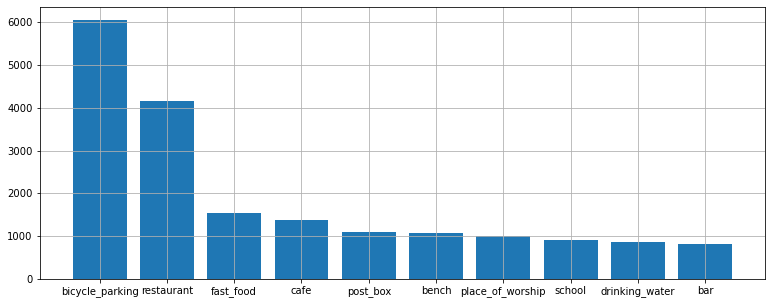

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))

# top 10 amenities
amenities = df["amenity"].value_counts().nlargest(10)
plt.bar(amenities.index, amenities.values)

plt.grid()
plt.show()

4. Show the points of interest on the New York map for a given category (e.g. amenity). To do so, you have to define a new function (or a new class) that, given the name of the POI category is able to show a scatter plot of the locations of the POI types, onto the New York municipality map, with adifferent color for each category.
    - Are you able to identify areas in which the concentration of a specific POI type is higher thenothers?
    - How can you better characterize the POI distributions?


Before to see some amenities in particular, I prefer to fit all the couples (lat,long) over the image.

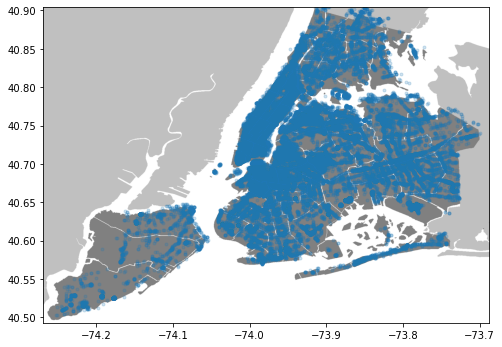

In [221]:
plt.figure(figsize=(8,14))
img = plt.imread("../Datasets/New_York_Point_Of_Interest/New_York_City_Map.PNG")

#in this way it will be horizontal
plt.scatter(df["@lon"],df["@lat"], marker=".", alpha=0.2)

axes = plt.gca()

# get limits on x and y, in order to fit the img
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()

# I found those offsets using a brute-force approach 
plt.imshow(img,extent = [x_lim[0]+0.011, x_lim[1]-0.015, y_lim[0]+0.011, y_lim[1]-0.03])

No we can parameterize that graph, by using a "given" category

In [187]:
def plotScatterImg(amenity):
    plt.figure(figsize=(8,14))
    img = plt.imread("../Datasets/New_York_Point_Of_Interest/New_York_City_Map.PNG")
    
    df_am = df[df["amenity"] == amenity]
    df_am = df_am[["@lat","@lon"]]
    
    #in this way it will be horizontal
    plt.scatter(df_am["@lon"],df_am["@lat"], marker=".")

    axes = plt.gca()

    # get limits on x and y, in order to fit the img
    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()

    # I found those offset using a brute-force approach (try by try..)
    plt.imshow(img,extent = [x_lim[0]+0.011, x_lim[1]-0.015, 
                             y_lim[0]+0.011, y_lim[1]-0.03])

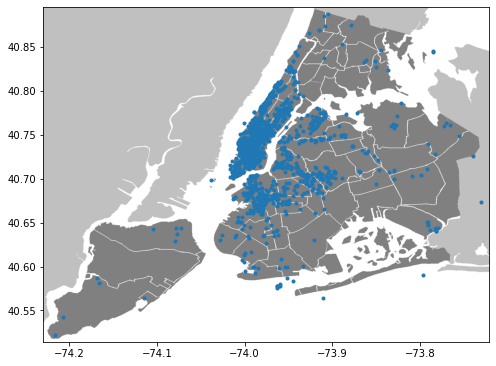

In [223]:
plotScatterImg("cafe")

Well, of course a stronger concentration of points means a stonger presence of those amenities. Then, for a better understanding I introduced the parameter $\alpha$ in order to  have a darker color over the most concentrated areas

5. Discretize the POIs by geographical position. Define a new function (or class) that is able to split the geographical position of the POIs using a grid. Once defined the grid over the New York municipality,the function has to assign each POI to the cell to which it belongs to. The result should be a Pandas DataFrame with a new column containing the cell_id for each POI.

In order to discretize, we need the map references. Firstly, we'll need to build up the coordinates interval for both x and y, by using linspace. The indices of those values will be used for placing the nodes on the actual grid. The value of the grid will be the "id" for the discretization

In [225]:
import numpy as np
row = np.linspace(40.55, 40.90, num=8)
col = np.linspace(-74.2,-73.7, num=6)
# coordinates
(row,col) 

(array([40.55, 40.6 , 40.65, 40.7 , 40.75, 40.8 , 40.85, 40.9 ]),
 array([-74.2, -74.1, -74. , -73.9, -73.8, -73.7]))

In [226]:
grid = np.linspace(0,(len(row)*len(col)-1),
                      (len(row)*len(col)),
                      dtype=int).reshape(len(row),len(col))
# values
grid

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

In [227]:
import numpy as np
import math

def discretize(df_cont):
    # lat : limit values
    row = np.linspace(40.55, 40.90, num=8)
    # lon : limit values
    col = np.linspace(-74.2,-73.7, num=6)
    
    # build the reference grid
    # those values will be the "id"
    grid = np.linspace(0,(len(row)*len(col)-1),
                      (len(row)*len(col)),
                      dtype=int).reshape(len(row),len(col))
    """
        the indexes will be
        row_i = math.floor((40.90-lat)/0.05)
        col_i = math.ceil((74.2+lon)/0.1)
    """
    return df_cont.apply(lambda x: grid[math.floor((40.90-x['@lat'])/0.05)][math.ceil((74.2+x['@lon'])/0.1)],axis=1)

In [228]:
df["cell_id"] = discretize(df)
df.sample()

,@type,@lat,@lon,amenity,name,shop,public_transport,highway,cell_id
@id,,,,,,,,,
5902078282,node,40.689427,-73.971592,bench,NaN,NaN,NaN,NaN,27


6. Now you have to identify how many times a POI type is contained in each cell, for each category.Create a new DataFrame containing the cell_id as index, the POI types as columns and the count of the occurrences of each type, in each cell, as values.

In [229]:
df_cells = df.pivot_table(index='cell_id', columns='amenity',aggfunc='count')
df_cells = df_cells.fillna(0)
df_cells.head()

@lat                                                          \
amenity Green_Market Statue animal_boarding animal_shelter arts_centre   atm   
cell_id                                                                        
3                0.0    0.0             0.0            0.0         0.0   4.0   
4                0.0    0.0             0.0            0.0         0.0   1.0   
5                0.0    0.0             0.0            0.0         0.0   0.0   
9                0.0    0.0             0.0            1.0         1.0  11.0   
10               0.0    0.0             0.0            0.0         2.0   0.0   

                                                              \
amenity  bank  bar  bbq bench bicycle_parking bicycle_rental   
cell_id                                                        
3         8.0  9.0  0.0  39.0            36.0            0.0   
4         8.0  6.0  0.0   7.0            82.0            0.0   
5         0.0  0.0  0.0   0.0             0.0            0.0   
9        27.0  8.0  2.0  23.0           315.0            3.0   
10        9.0  3.0  0.0   9.0           126.0            0.0   

                                                                  \
amenity bicycle_repair_station biergarten binoculars boat_rental   
cell_id                                                            
3                          0.0        0.0        0.0         0.0   
4                          0.0        0.0        0.0         0.0   
5                          0.0        0.0        0.0         0.0   
9                          0.0        1.0        0.0         0.0   
10                         1.0        0.0        0.0         0.0   

                                                                            \
amenity bureau_de_change bus_station  cafe car_rental car_sharing car_wash   
cell_id                                                                      
3                    0.0         0.0   8.0        0.0         0.0      0.0   
4                    0.0         0.0   2.0        2.0         0.0      1.0   
5                    0.0         0.0   0.0        0.0         0.0      0.0   
9                    0.0         0.0  46.0        0.0         3.0      0.0   
10                   0.0         0.0   6.0        2.0         0.0      1.0   

                                                                               \
amenity charging_station childcare cinema clinic clock clothing store college   
cell_id                                                                         
3                    0.0       1.0    0.0    0.0   0.0            0.0     0.0   
4                    0.0       0.0    0.0    3.0   0.0            0.0     0.0   
5                    0.0       0.0    0.0    0.0   0.0            0.0     0.0   
9                    0.0       0.0    1.0   12.0   0.0            0.0     4.0   
10                   0.0       0.0    1.0    6.0   0.0            0.0     0.0   

                                                                  \
amenity community_centre concert_hall courthouse coworking_space   
cell_id                                                            
3                    1.0          0.0        0.0             0.0   
4                    0.0          0.0        0.0             0.0   
5                    0.0          0.0        0.0             0.0   
9                    8.0          0.0        3.0             0.0   
10                   0.0          0.0        0.0             0.0   

                                                                    \
amenity dancing_school dentist disused doctors dojo drinking_water   
cell_id                                                              
3                  0.0     0.0     0.0     0.0  0.0           25.0   
4                  0.0     6.0     0.0     2.0  0.0           18.0   
5                  0.0     0.0     0.0     0.0  0.0            2.0   
9                  0.0     4.0     0.0     1.0  0.0           69.0   
10      

7. For the categories amenities and shop identify if there exist a correlation between the location of different POI types. Compute the pairwise correlation between the columns of the cell-type DataFrame and show it through a heatmap chart
    - Are you able to identify which are the POI types more correlated between each other? Whatdoes it mean?
    - Which are the more correlated tuples? Do they belong to the same category?

## Flight Delay Data
This dataset is made available by the Bureau of Transportation Statistics of the United States Departmentof Transportation. Measuring the performance of flight carriers (e.g. American Airlines, EasyJet) is extremely important for the transportation department and, for this reason, all the information related to each flight are constantly monitored and collected in huge databases by the Department of Transportation. To the aim of this laboratory, just a small set of information has been extracted. The dataset contains the Carrier On-Time Performance information collected from 01-01-2017 until 31-01-2017 for all the flights in the United States. Each row represents a flight in a specific day.Some of the most useful fields in the dataset are:
- FL_DATE: day of the flight in format YYYY-mm-dd.
- TAIL_NUM: aircraft registration number, unique to a single aircraft.
- UNIQUE_CARRIER: flight carrier id.
- FL_NUM: number of the flight.
- ORIGIN: departure airport code.
- DEST: destination airport code.
- CRS_DEP_TIME: scheduled departure time (local time: HHMM) shown in the carriers’ Computerized Reservations Systems (CRS)
- DEP_TIME: actual departure time (local time: HHMM)
- DEP_DELAY: overall delay at departure. Difference in minutes (floating point number) between scheduled and actual departure time. Early departures set to 0.
- CRS_ARR_TIME: scheduled arrival time (local time: HHMM) shown in the carriers’ Computerized Reservations Systems (CRS)
- ARR_TIME: actual arrival time (local time: HHMM)
- ARR_DELAY: overall delay. Difference in minutes (floating point number) between scheduled andactual arrival time. Early arrivals show negative numbers.
- CARRIER_DELAY: delay in minutes (floating point number) caused by the carrier.
- WEATHER_DELAY: delay in minutes (floating point number) caused by the weather.
- NAS_DELAY: delay in minutes (floating point number) caused by the National Air System (NAS).
- SECURITY_DELAY: delay in minutes (floating point number) caused by the security.
- LATE_AIRCRAFT_DELAY: delay in minutes (floating point number) caused by the aircraft.

### Questions
1. Load the Flight Delay dataset exploiting Pandas APIs.

In [2]:
import pandas as pd

df_flight = pd.read_csv('../Datasets/831394006_T_ONTIME.csv')
df_flight.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,1209.0,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,1809.0,42.0,0.0,NaN,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,2040.0,42.0,0.0,NaN,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,1749.0,97.0,0.0,NaN,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,642.0,42.0,0.0,NaN,0.0,0.0,42.0,0.0,0.0,NaN


2. Use the info() and describe() methods to analyze how your records are distributed. Before continuing, try to answer the following questions:
    - which type does each column have?
    - are there any missing values?
    - how many unique carriers are present?
    - how many unique airports are present?
    - from which time interval data were collected?

In [3]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                450017 non-null  object 
 1   UNIQUE_CARRIER         450017 non-null  object 
 2   AIRLINE_ID             450017 non-null  int64  
 3   TAIL_NUM               449378 non-null  object 
 4   FL_NUM                 450017 non-null  int64  
 5   ORIGIN_AIRPORT_ID      450017 non-null  int64  
 6   ORIGIN_AIRPORT_SEQ_ID  450017 non-null  int64  
 7   ORIGIN_CITY_MARKET_ID  450017 non-null  int64  
 8   ORIGIN                 450017 non-null  object 
 9   ORIGIN_CITY_NAME       450017 non-null  object 
 10  DEST_AIRPORT_ID        450017 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    450017 non-null  int64  
 12  DEST_CITY_MARKET_ID    450017 non-null  int64  
 13  DEST                   450017 non-null  object 
 14  DEST_CITY_NAME         450017 non-nu

In [4]:
pd.set_option('display.max_columns', None)
df_flight.describe()

,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
count,450017.000000,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,441476.000000,441476.000000,441244.000000,441244.00000,440746.000000,440746.000000,450017.000000,440746.000000,439645.000000,450017.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000,0.0
mean,19900.483275,2079.643193,12698.267568,1.269830e+06,31738.603264,12698.024626,1.269805e+06,31738.404640,1327.757407,1333.947392,12.134768,17.066131,1357.31372,1482.709844,7.694634,1506.278285,1487.332958,6.954484,0.019746,20.308836,3.368857,15.742495,0.079745,24.947492,NaN
std,385.381448,1722.700045,1534.326936,1.534324e+05,1286.063689,1534.246611,1.534244e+05,1285.791081,481.548320,494.957196,47.274204,9.948178,495.52371,519.134977,6.494151,501.853851,523.821795,49.595992,0.139126,60.649157,27.809756,32.328181,2.896287,47.850860,NaN
min,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,1.000000,-59.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,19690.000000,679.000000,11292.000000,1.129202e+06,30647.000000,11292.000000,1.129202e+06,30647.000000,917.000000,921.000000,-5.000000,11.000000,938.00000,1104.000000,5.000000,1120.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,19805.000000,1602.000000,12892.000000,1.289204e+06,31454.000000,12892.000000,1.289204e+06,31454.000000,1321.000000,1330.000000,-2.000000,14.000000,1343.00000,1518.000000,6.000000,1529.000000,1521.000000,-5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,NaN
75%,20304.000000,3034.000000,14057.000000,1.405702e+06,32467.000000,14057.000000,1.405702e+06,32467.000000,1730.000000,1738.000000,10.000000,20.000000,1752.00000,1916.000000,9.000000,1921.000000,1921.000000,11.000000,0.000000,17.000000,0.000000,20.000000,0.000000,31.000000,NaN
max,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,2400.000000,2755.000000,176.000000,2400.00000,2400.000000,413.000000,2359.000000,2400.000000,1944.000000,1.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000,NaN


In [5]:
df_flight.isnull().sum()

FL_DATE                       0
UNIQUE_CARRIER                0
AIRLINE_ID                    0
TAIL_NUM                    639
FL_NUM                        0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
ORIGIN                        0
ORIGIN_CITY_NAME              0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
DEST                          0
DEST_CITY_NAME                0
CRS_DEP_TIME                  0
DEP_TIME                   8541
DEP_DELAY                  8541
TAXI_OUT                   8773
WHEELS_OFF                 8773
WHEELS_ON                  9271
TAXI_IN                    9271
CRS_ARR_TIME                  0
ARR_TIME                   9271
ARR_DELAY                 10372
CANCELLED                     0
CANCELLATION_CODE        441131
CARRIER_DELAY            352318
WEATHER_DELAY            352318
NAS_DELAY                352318
SECURITY_DELAY           352318
LATE_AIR

In [6]:
len(set(df_flight["UNIQUE_CARRIER"]))

12

In [7]:
# distinct airport IDs
len(set(df_flight["ORIGIN_AIRPORT_ID"] + df_flight["DEST_AIRPORT_ID"]))

1837

In [8]:
df_flight["FL_DATE"].sort_values()

0         2017-01-01
9307      2017-01-01
9308      2017-01-01
9309      2017-01-01
9310      2017-01-01
             ...    
440302    2017-01-31
440303    2017-01-31
440304    2017-01-31
440278    2017-01-31
450016    2017-01-31
Name: FL_DATE, Length: 450017, dtype: object

So, we can answer in order: 
1. There are 33 column - float64(15), int64(10), object(8)
2. There are severl missing values, mostly on CANCELLATION_CODE
3. There are 12 unique carriers
4. There are 1837 unique airports ID
5. Those records regard the whole traffic of January 2017

3. Filter out all canceled flights

In [9]:
df_flight = df_flight[df_flight["CANCELLED"] == 0.0]

4. Use any pandas method and functionality to answer the following queries:
    - how many flights had each carrier operated?
    - for each carrier, compute the mean delay considering all possible reasons (due to the carrier,weather, etc.)

In [10]:
out = pd.merge(df_flight[["UNIQUE_CARRIER","FL_DATE"]].groupby("UNIQUE_CARRIER",as_index=False).count(),
               df_flight[["UNIQUE_CARRIER","ARR_DELAY"]].groupby("UNIQUE_CARRIER",as_index=False).mean(),)
out.rename(columns={'FL_DATE':'COUNT'})

,UNIQUE_CARRIER,COUNT,ARR_DELAY
0,AA,72152,3.307004
1,AS,14454,3.311553
2,B6,24077,8.423231
3,DL,69031,4.305279
4,EV,33878,13.173011
5,F9,7598,12.076791
6,HA,6258,3.617181
7,NK,12129,8.993642
8,OO,48266,12.528524
9,UA,42171,4.911975


5. add two new columns to your DataFrame:
    - weekday: it is the day of the week expressed as an integer number. 
    - delaydelta: it is the difference between the arrival delay and the departure one.

In [11]:
day_of_weeks = pd.date_range('2017-01-01', '2017-01-31', freq='D').to_series()
day_of_weeks.dt.dayofweek[:7]

2017-01-01    6
2017-01-02    0
2017-01-03    1
2017-01-04    2
2017-01-05    3
2017-01-06    4
2017-01-07    5
Freq: D, dtype: int64

In [12]:
df_flight["DAY_OF_WEEK"] = df_flight.apply(lambda x: day_of_weeks.dt.dayofweek[x['FL_DATE']],axis=1)

In [13]:
df_flight["DELAY_DELTA"] = df_flight.apply(lambda x: x['ARR_DELAY']-x['DEP_DELAY'],axis=1)

In [14]:
df_flight.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32,DAY_OF_WEEK,DELAY_DELTA
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",12892,1289204,32575,LAX,"Los Angeles, CA",800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0,NaN,6,-4.0
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",12478,1247803,31703,JFK,"New York, NY",900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,NaN,34.0,0.0,8.0,0.0,0.0,NaN,6,8.0
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",12478,1247803,31703,JFK,"New York, NY",1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,NaN,7.0,0.0,0.0,0.0,35.0,NaN,6,-9.0
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",12173,1217302,32134,HNL,"Honolulu, HI",1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,NaN,77.0,0.0,20.0,0.0,0.0,NaN,6,20.0
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,NaN,0.0,0.0,42.0,0.0,0.0,NaN,6,42.0


6. Choose one of the visualization tools that you know and inspect the arrival delay as a function of the day of the week. Can you find any correlation?

Text(0.5, 1.0, 'AVERAGE DELAY PER DAY')

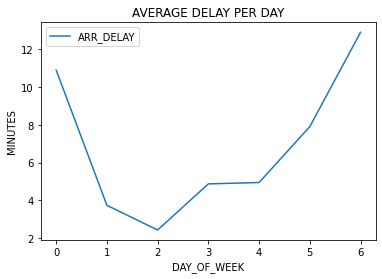

In [15]:
import matplotlib.pyplot as plt

df_flight[["DAY_OF_WEEK","ARR_DELAY"]].groupby("DAY_OF_WEEK").mean().plot()
plt.ylabel("MINUTES")
plt.title("AVERAGE DELAY PER DAY")

7. Consider the weekend days only, compute, for each carrier, the mean arrival delay. Now consider the working days and compute, for each carrier, the mean arrival time. Then, compare the delays in working days and in weekends for each company.
    - Are you able to identify companies that are delayed only in weekends or only in working days? Why?

In [16]:
# I'll add a new column "WORKING_DAY" that will be 1 or 0
df_flight["WORKING_DAY"] = df_flight.apply(lambda x: 1 if x['DAY_OF_WEEK'] < 6 else 0,axis=1)

In [17]:
df_delay = df_flight[["UNIQUE_CARRIER","ARR_DELAY","WORKING_DAY"]]
df_delay.head(3)

,UNIQUE_CARRIER,ARR_DELAY,WORKING_DAY
0,AA,27.0,0
1,AA,42.0,0
2,AA,42.0,0


In [18]:
df_delay.set_index(["UNIQUE_CARRIER","WORKING_DAY"]).groupby(["UNIQUE_CARRIER","WORKING_DAY"]).mean()

ARR_DELAY
UNIQUE_CARRIER WORKING_DAY           
AA             0             7.764121
               1             2.470775
AS             0            11.400962
               1             1.782461
B6             0            18.823760
               1             6.445178
DL             0            23.250943
               1             0.956326
EV             0            17.601550
               1            12.396551
F9             0            11.655117
               1            12.159356
HA             0             4.578999
               1             3.429855
NK             0            14.073158
               1             8.024093
OO             0            11.274667
               1            12.755562
UA             0            10.890128
               1             3.810346
VX             0            21.403409
               1            14.470137
WN             0             8.716154
               1             6.415151

The companies with the highest gap are: AS, B6, DL, NK, VX

8. Create a Pandas DataFrame with a multi-index composed of the columns: unique_carrier, origin,dest, fl_date

In [19]:
df_multi = df_flight.set_index(["UNIQUE_CARRIER","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID","FL_DATE"])
df_multi

AIRLINE_ID  \
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE                  
AA             12478             12892           2017-01-01       19805   
               12892             12478           2017-01-01       19805   
                                                 2017-01-01       19805   
               11298             12173           2017-01-01       19805   
               13830             11298           2017-01-01       19805   
...                                                                 ...   
NK             11697             13487           2017-01-31       20416   
               13487             11697           2017-01-31       20416   
               10397             14100           2017-01-31       20416   
               11697             10397           2017-01-31       20416   
                                 12953           2017-01-31       20416   

                                                            TAIL_NUM  FL_NUM  \
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE                       
AA             12478             12892           2017-01-01   N787AA       1   
               12892             12478           2017-01-01   N783AA       2   
                                                 2017-01-01   N791AA       4   
               11298             12173           2017-01-01   N391AA       5   
               13830             11298           2017-01-01   N346AA       6   
...                                                              ...     ...   
NK             11697             13487           2017-01-31   N625NK     596   
               13487             11697           2017-01-31   N613NK     597   
               10397             14100           2017-01-31   N505NK     600   
               11697             10397           2017-01-31   N505NK     600   
                                 12953           2017-01-31   N613NK     604   

                                                             ORIGIN_AIRPORT_SEQ_ID  \
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE                             
AA             12478             12892           2017-01-01                1247803   
               12892             12478           2017-01-01                1289204   
                                                 2017-01-01                1289204   
               11298             12173           2017-01-01                1129804   
               13830             11298           2017-01-01                1383002   
...                                                                            ...   
NK             11697             13487           2017-01-31                1169704   
               13487             11697           2017-01-31                1348702   
               10397             14100           2017-01-31                1039705   
               11697             10397           2017-01-31                1169704   
                                 12953           2017-01-31                1169704   

                                                             ORIGIN_CITY_MARKET_ID  \
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE                             
AA             12478             12892           2017-01-01                  31703   
               12892             12478           2017-01-01                  32575   
                                                 2017-01-01                  32575   
               11298             12173           2017-01-01                  30194   
               13830             11298           2017-01-01                  33830   
...                                                                            ...   
NK             11697             13487           2017-01-31                  32467   
               13487             11697           2017-01-31                  31650   
               10397             14100           2017-01-31      

9. For each flight operated by American Airlines (AA) and Delta Airlines (DL), taken off from the LosAngeles International Airport (LAX) and for each date, display the departure time and delay.

In [20]:
df_multi.loc[['AA','DL']].query("ORIGIN == 'LAX'")[["DEP_TIME","ARR_DELAY"]]

DEP_TIME  \
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE                
AA             12892             12478           2017-01-01     934.0   
                                                 2017-01-01    1221.0   
                                                 2017-01-01    2100.0   
                                                 2017-01-01    1346.0   
                                                 2017-01-01    2202.0   
...                                                               ...   
DL             12892             14869           2017-01-31    1144.0   
                                 10693           2017-01-31    1037.0   
                                 12339           2017-01-31    2238.0   
                                 14057           2017-01-31    1242.0   
                                 10397           2017-01-31    2337.0   

                                                             ARR_DELAY  
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE                
AA             12892             12478           2017-01-01       42.0  
                                                 2017-01-01       42.0  
                                                 2017-01-01      -30.0  
                                                 2017-01-01       -5.0  
                                                 2017-01-01       25.0  
...                                                                ...  
DL             12892             14869           2017-01-31      -20.0  
                                 10693           2017-01-31      -12.0  
                                 12339           2017-01-31      -25.0  
                                 14057           2017-01-31      -15.0  
                                 10397           2017-01-31       -5.0  

[5437 rows x 2 columns]

10. For each flight that flew in the first week of the month, with LAX as destination airport, compute the mean arrival delay.

In [21]:
import datetime 

base = datetime.datetime(2017,1,7)
date_list = [(base - datetime.timedelta(days=x)).date().strftime("%Y-%m-%d") for x in range(7)]

# If I use : on the first index, it gives me an error 
# So I'll use a set of all Carriers
unique_carriers = set(df_flight["UNIQUE_CARRIER"])

# check di output
df_multi.loc[unique_carriers,:,:,date_list].query("DEST == 'LAX'")[["ARR_DELAY"]]

ARR_DELAY
UNIQUE_CARRIER ORIGIN_AIRPORT_ID DEST_AIRPORT_ID FL_DATE              
OO             14869             12892           2017-01-01      -11.0
               12889             12892           2017-01-01      -30.0
               15376             12892           2017-01-01       93.0
               11109             12892           2017-01-01      -13.0
               12094             12892           2017-01-01      -13.0
...                                                                ...
DL             10397             12892           2017-01-07      144.0
               12339             12892           2017-01-07       18.0
               13495             12892           2017-01-07       31.0
               14747             12892           2017-01-07       93.0
               11433             12892           2017-01-07       58.0

[3945 rows x 1 columns]

In [22]:
# the answer will be here
df_multi.loc[unique_carriers,:,:,date_list].query("DEST == 'LAX'")[["ARR_DELAY"]].mean()

ARR_DELAY    32.26631
dtype: float64

11. Generate a pivot table containing the number of departed flights for each carrier and for each day of the week and show it. Compute now the pairwise correlation between the carriers and show it on a heatmap.
    - What does this correlation matrix represent?
    - Can you find any carrier with different flight plans?

In [23]:
df_piv = df_flight.pivot_table('FL_NUM', 
                               columns='UNIQUE_CARRIER',
                               index='DAY_OF_WEEK',
                               aggfunc='count')
df_piv

UNIQUE_CARRIER,AA,AS,B6,DL,EV,F9,HA,NK,OO,UA,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,
0,12035,2440,4063,12157,5935,1239,987,1954,8321,7498,986,17913
1,11457,2261,3942,11512,5649,1214,966,1970,7912,6883,914,17855
2,9651,1806,3143,9248,4627,976,791,1616,6413,5384,741,14260
3,9854,1935,3258,9695,4923,983,802,1610,6631,5956,791,14220
4,9820,1953,3169,9521,4774,986,864,1563,6667,5920,792,14012
5,7905,1762,2643,6492,2905,955,826,1470,4913,3964,522,11168
6,11430,2297,3859,10406,5065,1245,1022,1946,7409,6566,899,16044


<AxesSubplot:xlabel='UNIQUE_CARRIER', ylabel='UNIQUE_CARRIER'>

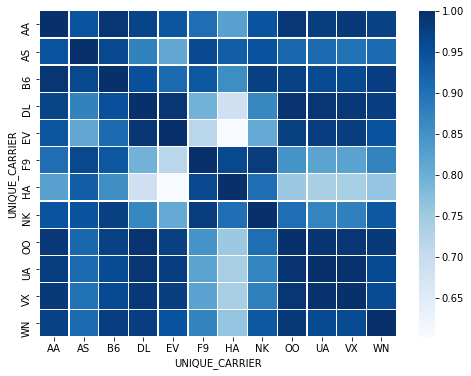

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_piv.corr(), annot=False, cmap="Blues",linewidth=0.3)

12. Generate a pivot table containing the average arrival delay, for each carrier and for each day of the week and show it. Compute now the pairwise correlation between the carriers and show it on a heatmap.
    - What does this correlation matrix represent?
    - Can you find any carrier with different delay behaviors?

In [26]:
df_piv2 = df_flight.pivot_table('ARR_DELAY', 
                               columns='UNIQUE_CARRIER',
                               index='DAY_OF_WEEK',
                               aggfunc='mean')
df_piv2

UNIQUE_CARRIER,AA,AS,B6,DL,EV,F9,HA,NK,OO,UA,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,
0,6.166653,1.744243,12.745117,5.652933,22.496612,23.677445,2.127660,15.736303,17.011347,9.877057,18.258567,10.891738
1,0.899956,-0.795982,7.053235,-4.535590,10.791889,13.563380,1.141969,7.421534,11.123554,5.498687,19.964444,2.835325
2,-0.733742,5.797327,1.656450,-5.432658,5.689274,8.149744,1.416984,2.780186,10.783691,1.972103,15.483039,3.760267
3,1.167107,4.365145,-0.285054,-4.369801,8.576665,11.303772,1.624220,7.838409,15.675984,1.998656,14.533079,8.793300
4,2.849597,1.041602,4.651251,-2.084867,9.070754,9.160569,8.109954,6.500963,12.453080,0.034880,9.178117,8.020024
5,4.184057,-0.996014,12.001899,23.544369,17.576776,3.518868,6.437046,6.157572,7.208863,0.276019,4.335271,3.303969
6,7.764121,11.400962,18.823760,23.250943,17.601550,11.655117,4.578999,14.073158,11.274667,10.890128,21.403409,8.716154


<AxesSubplot:xlabel='UNIQUE_CARRIER', ylabel='UNIQUE_CARRIER'>

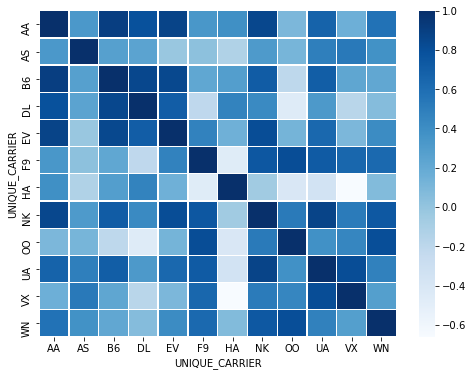

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_piv2.corr(), annot=False, cmap="Blues",linewidth=0.3)

13. Using a pivot table, for the carriers HA, DL, AA and AS compute the averagedelta delay for each day of the week. Then, display the results on a line plot, having a line per carrier and the weekdayon the x-axis. 

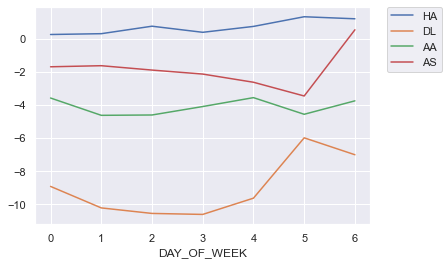

In [42]:
# check if it is possible to filter in advice (in the pivot table)
# those values
sns.set()

filterList = ['HA','DL','AA','AS']
df_piv3 = df_flight.pivot_table('DELAY_DELTA', 
                               columns='UNIQUE_CARRIER',
                               index='DAY_OF_WEEK',
                               aggfunc='mean')
df_piv3 = df_piv3[filterList]
df_piv3.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)